# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.188225e+01     1.577294e+01
 * time: 0.0038309097290039062
     1     6.090243e+01     1.031473e+01
 * time: 0.011421918869018555
     2     5.575513e+01     1.371393e+01
 * time: 0.02894902229309082
     3     3.968718e+01     8.853662e+00
 * time: 0.05364584922790527
     4     3.082821e+01     7.901405e+00
 * time: 0.0778648853302002
     5     2.865285e+01     7.640777e+00
 * time: 0.10992288589477539
     6     1.387594e+01     3.450105e+00
 * time: 0.21651387214660645
     7     9.369936e+00     2.600433e+00
 * time: 0.2332160472869873
     8     7.929522e+00     3.880326e+00
 * time: 0.24995803833007812
     9     7.326452e+00     2.117996e+00
 * time: 0.2666008472442627
    10     6.692772e+00     3.809975e+00
 * time: 0.28024792671203613
    11     6.443634e+00     1.809342e+00
 * time: 0.29347896575927734
    12     6.277653e+00     2.107722e+00
 * time: 0.3067970275878906
    13     6.165292e+00     1.684312e+00
 * time: 

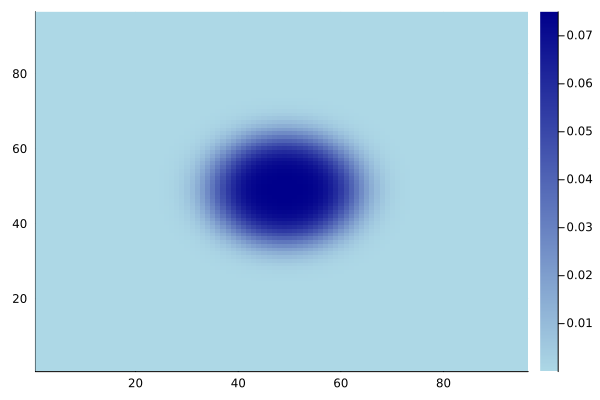

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)